In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


In [50]:
# Generación de datos sintéticos para segmentación de clientes
np.random.seed(42)  # Fijar la semilla para reproducibilidad

# Crear datos ficticios
edad = np.random.randint(18, 70, 200)  # Edades entre 18 y 70 años
ingresos = np.random.randint(2000000, 12000000, 200)  # Ingresos entre 2M y 12M COP
porcentaje_gasto = np.random.uniform(0.1, 0.9, 200)  # % de ingreso gastado
gasto = ingresos * porcentaje_gasto  # Calcular gasto como % del ingreso

# Estratos socioeconómicos (1 a 6 en Colombia)
estratos = np.random.randint(1, 7, 200)

# Ciudades ficticias de Colombia
ciudades = np.random.choice(['Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena'], 200)

# Crear DataFrame con los datos
data = pd.DataFrame({'Edad': edad, 'Ingresos (COP)': ingresos, 'Gasto (COP)': gasto, 'Estrato': estratos, 'Ciudad': ciudades})

In [51]:
data

,Edad,Ingresos (COP),Gasto (COP),Estrato,Ciudad
0,56,4548421,5.658245e+05,4,Barranquilla
1,69,3954109,5.135539e+05,4,Bogotá
2,46,6422880,4.869060e+06,5,Bogotá
3,32,9205547,3.573156e+06,2,Cali
4,60,10323735,2.081765e+06,4,Cartagena
...,...,...,...,...,...
195,69,5239576,4.301306e+06,6,Barranquilla
196,30,7893309,1.076309e+06,3,Medellín
197,58,7948540,2.581452e+06,5,Cali
198,20,6249913,5.376983e+06,1,Cali


In [54]:
# Normalización de datos para mejorar la eficiencia del clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Edad', 'Ingresos (COP)', 'Gasto (COP)']])

In [53]:
data_scaled

array([[ 0.84370444, -0.8088526 , -1.20865237],
       [ 1.71592374, -1.02100892, -1.23106339],
       [ 0.17276652, -0.13971193,  0.63636277],
       [-0.76654658,  0.85363902,  0.08074322],
       [ 1.11207961,  1.25280756, -0.55869191],
       [-1.23620312,  0.58652915,  0.42630986],
       [-0.36398382, -1.22443606, -0.41234181],
       [ 0.84370444, -1.69677616, -1.21030522],
       [-0.49817141,  0.56961303,  0.70611696],
       [-0.22979624, -1.18448093, -1.19900336],
       [-1.03492175, -1.70453472, -1.32766128],
       [-1.03492175,  0.59625216,  0.45887251],
       [-0.16270245, -0.51913281, -0.22748864],
       [ 0.64242306,  1.01405138,  1.07364274],
       [ 0.91079823, -0.19799145,  0.37608892],
       [-0.16270245,  0.05189138,  1.17665182],
       [-1.57167208,  0.32531976,  0.24811565],
       [-0.29689003, -1.56976588, -1.07989804],
       [-1.63876588,  0.80621378,  1.41231373],
       [-0.16270245,  0.93494041, -0.17048496],
       [ 1.1791734 ,  0.05383084, -0.103

In [55]:
# Clustering Jerárquico
linked = linkage(data_scaled, method='ward')  # Construir la estructura jerárquica con método de Ward

In [56]:
linked

array([[4.10000000e+01, 1.31000000e+02, 9.43752177e-02, 2.00000000e+00],
       [5.60000000e+01, 1.89000000e+02, 9.76983005e-02, 2.00000000e+00],
       [6.70000000e+01, 1.91000000e+02, 1.07466864e-01, 2.00000000e+00],
       [1.61000000e+02, 1.92000000e+02, 1.09425231e-01, 2.00000000e+00],
       [1.32000000e+02, 1.39000000e+02, 1.28740127e-01, 2.00000000e+00],
       [1.49000000e+02, 1.82000000e+02, 1.38354131e-01, 2.00000000e+00],
       [7.00000000e+00, 2.20000000e+01, 1.54467112e-01, 2.00000000e+00],
       [9.50000000e+01, 1.30000000e+02, 1.63992734e-01, 2.00000000e+00],
       [1.02000000e+02, 1.36000000e+02, 1.69765803e-01, 2.00000000e+00],
       [1.20000000e+02, 1.58000000e+02, 1.70972100e-01, 2.00000000e+00],
       [1.73000000e+02, 1.87000000e+02, 1.71605436e-01, 2.00000000e+00],
       [4.00000000e+01, 1.01000000e+02, 1.73959787e-01, 2.00000000e+00],
       [3.50000000e+01, 1.72000000e+02, 1.85810966e-01, 2.00000000e+00],
       [2.80000000e+01, 9.00000000e+01, 1.90091380e

In [57]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')  # Definir modelo K-Means con 3 clusters
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)  # Asignar cluster a cada cliente

In [59]:
data

,Edad,Ingresos (COP),Gasto (COP),Estrato,Ciudad,KMeans_Cluster
0,56,4548421,5.658245e+05,4,Barranquilla,2
1,69,3954109,5.135539e+05,4,Bogotá,2
2,46,6422880,4.869060e+06,5,Bogotá,1
3,32,9205547,3.573156e+06,2,Cali,0
4,60,10323735,2.081765e+06,4,Cartagena,1
...,...,...,...,...,...,...
195,69,5239576,4.301306e+06,6,Barranquilla,2
196,30,7893309,1.076309e+06,3,Medellín,0
197,58,7948540,2.581452e+06,5,Cali,2
198,20,6249913,5.376983e+06,1,Cali,0


In [60]:
# DBSCAN Clustering (basado en densidad)
eps_value = 0.5  # Ajuste del parámetro de distancia mínima
min_samples_value = 5  # Número mínimo de muestras por cluster
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)  # Asignar cluster a cada cliente

In [61]:
data

,Edad,Ingresos (COP),Gasto (COP),Estrato,Ciudad,KMeans_Cluster,DBSCAN_Cluster
0,56,4548421,5.658245e+05,4,Barranquilla,2,0
1,69,3954109,5.135539e+05,4,Bogotá,2,3
2,46,6422880,4.869060e+06,5,Bogotá,1,0
3,32,9205547,3.573156e+06,2,Cali,0,4
4,60,10323735,2.081765e+06,4,Cartagena,1,1
...,...,...,...,...,...,...,...
195,69,5239576,4.301306e+06,6,Barranquilla,2,-1
196,30,7893309,1.076309e+06,3,Medellín,0,-1
197,58,7948540,2.581452e+06,5,Cali,2,-1
198,20,6249913,5.376983e+06,1,Cali,0,-1


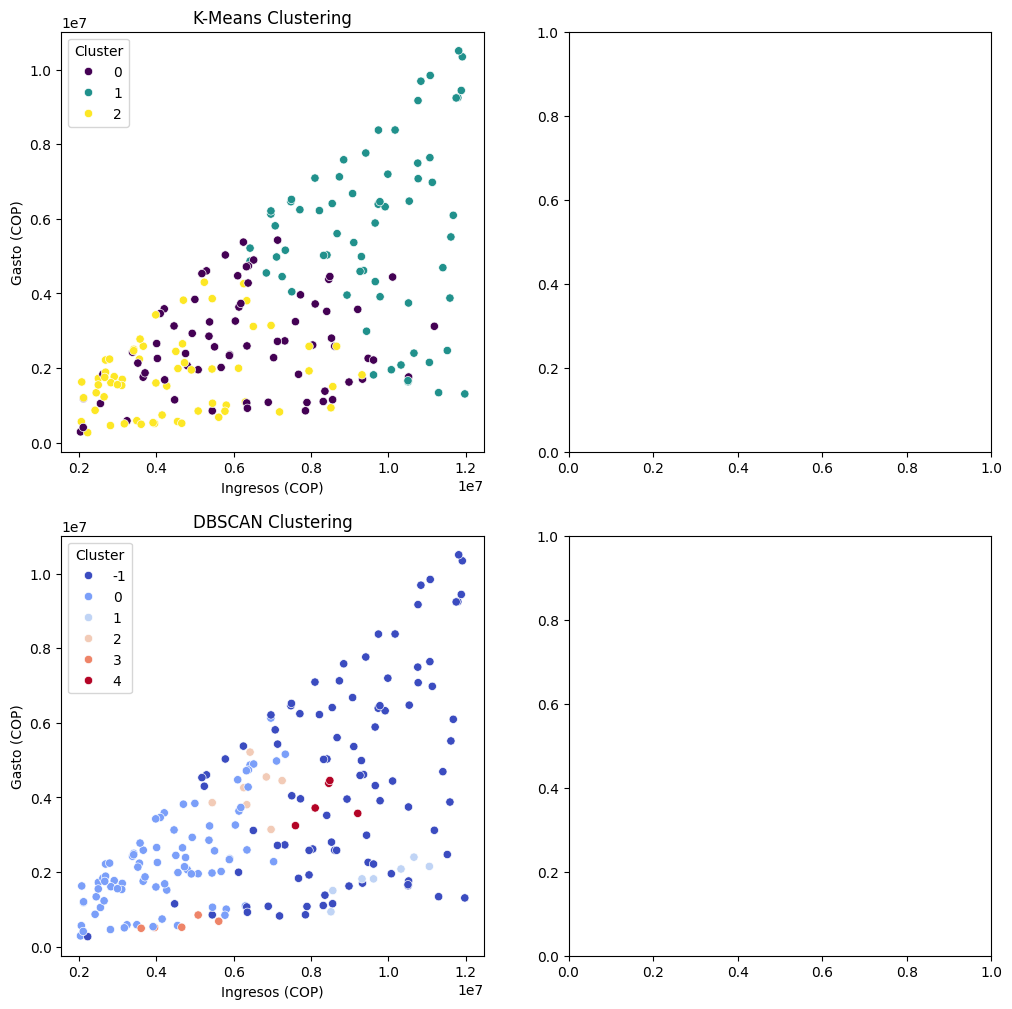

In [62]:
# Visualización de los clusters
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# K-Means
sns.scatterplot(x=data['Ingresos (COP)'], y=data['Gasto (COP)'], hue=data['KMeans_Cluster'], palette='viridis', ax=axes[0,0])
axes[0,0].set_title("K-Means Clustering")
axes[0,0].legend(title="Cluster")

# DBSCAN
sns.scatterplot(x=data['Ingresos (COP)'], y=data['Gasto (COP)'], hue=data['DBSCAN_Cluster'], palette='coolwarm', ax=axes[1,0])
axes[1,0].set_title("DBSCAN Clustering")
axes[1,0].legend(title="Cluster")


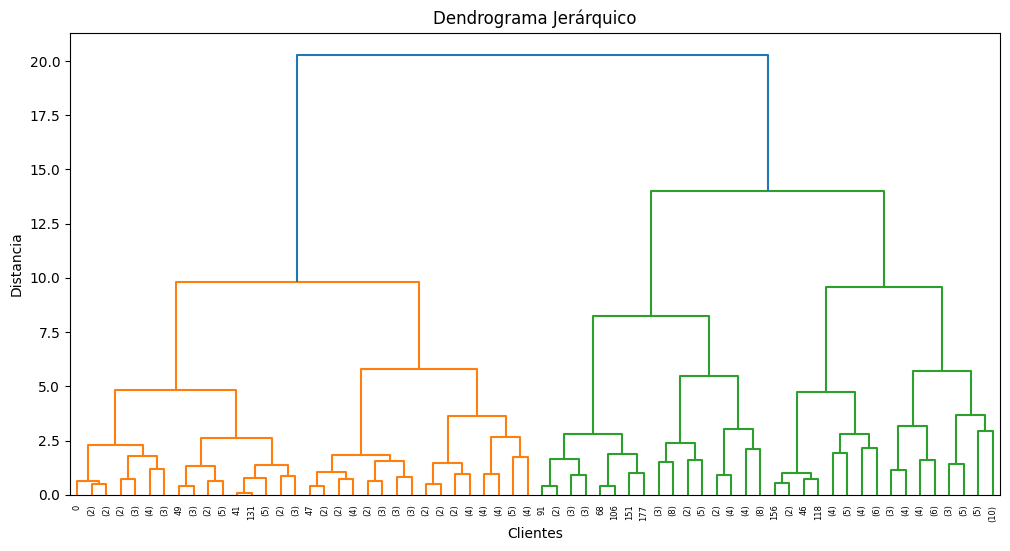

In [63]:
# Clustering Jerárquico (dendrograma) en una figura independiente
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)  # Dendrograma truncado para mejor visualización
plt.title("Dendrograma Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()

**Averigua qué son los clusters basados en modelos probabilísticos y genera código para ejecutarlo y representarlo**